In [123]:
# importing the necessary libraries for classicication

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor

In [47]:
# importing the necessary libraries for regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [48]:
#calling avocado file
avo=pd.read_csv('https://raw.githubusercontent.com/erkansirin78/datasets/master/avocado.csv')

In [49]:
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There are total 18249 rows and 14 columns in the dataset.
This data was downloaded from the Hass Avocado Board website in May of 2018 . 
The table represents weekly 2018 retail scan data for National retail volume (units) and price. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost. 


In [50]:
avo.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Top 15 rows and columns of the given dataset.

In [51]:
avo.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5376,20,2016-08-07,1.53,60523.63,2724.18,41584.42,2.00,16213.03,15518.03,0.00,695.00,conventional,2016,Syracuse
17347,9,2017-10-29,1.35,7073.65,78.85,61.04,0.00,6933.76,6933.76,0.00,0.00,organic,2017,Syracuse
14213,44,2016-02-21,1.41,29590.91,362.25,14316.01,34.15,14878.50,1207.09,13671.41,0.00,organic,2016,Seattle
527,7,2015-11-08,0.95,152084.79,61494.68,35336.71,29583.90,25669.50,14899.79,6935.32,3834.39,conventional,2015,Columbus
6985,44,2017-02-26,1.20,3310530.37,689256.50,1618434.51,52647.95,950191.41,823879.69,123351.91,2959.81,conventional,2017,Midsouth
14170,1,2016-12-18,1.08,46216.41,373.65,10784.30,1.31,35057.15,443.67,34613.48,0.00,organic,2016,Seattle
5192,44,2016-02-21,0.82,5108381.41,2872173.10,1020821.92,423920.15,791466.24,658990.14,124051.73,8424.37,conventional,2016,SouthCentral
4139,31,2016-05-22,1.08,3154318.39,658991.13,1530509.31,95835.45,868982.50,772949.59,78541.95,17490.96,conventional,2016,Midsouth
3313,37,2016-04-10,0.89,210309.77,4234.86,125252.70,8960.13,71862.08,21423.87,49093.66,1344.55,conventional,2016,CincinnatiDayton
8206,46,2017-02-12,0.99,153045.63,60850.47,12420.08,163.12,79611.96,79283.25,98.15,230.56,conventional,2017,StLouis


Random 10 rows and columns from the dataset.

In [52]:
avo['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

value count of the average price column.

In [53]:
avo.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

Name of all the columns.

In [54]:
avo.shape

(18249, 14)

total count of rows and columns.

In [55]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can see that there are no null values.
it can be seen that all the columns are mostly float dtype, only 2 int64 and 3 object.

In [56]:
avo.nunique().to_frame('No of unique values')

,No of unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


unique value counts of all the columns.

In [57]:
avo.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#This shows the statistical information of the numericalcolumns. It has no negative values from the above abservation we can say that-

The count of all columns are same as there is no missing values.
The median(50%) value is greater than mean in some of the columns, which means data is mixed type.
There is huge difference between the max and 75% so there are outliers present in the data.
The standard deviation,25% percentile value and min can be notice by this describe method.

<Axes: >

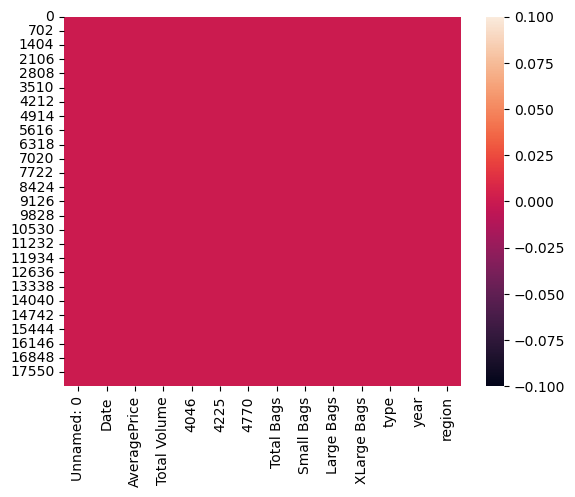

In [58]:
sns.heatmap(avo.isnull())

visualization of no null values through heatmap.
And we can see there are no null values as the colour is same.

<Axes: >

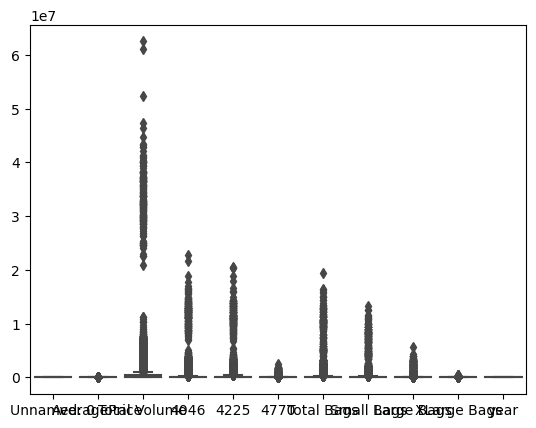

In [59]:
#dropping of duplicates values
avo.drop_duplicates(inplace=True)
sns.boxplot(avo)

In [60]:
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


As we can see there are no duplicate values as after dropping duplicate values the count of rows and columns are same.
That means no value is dropped.

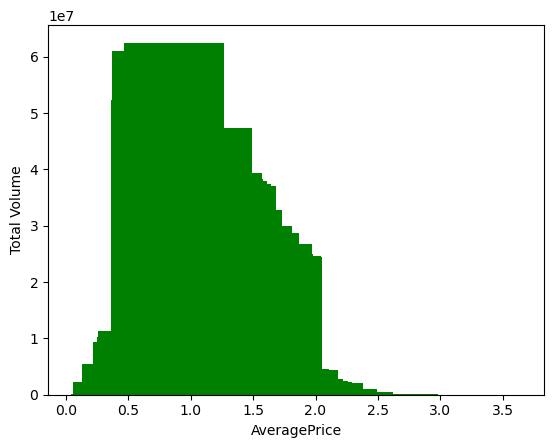

In [61]:
plt.bar(avo['AveragePrice'], avo['Total Volume'],color='green')
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.show()

visualization of averageprice in comparison to total volume through bargraph.

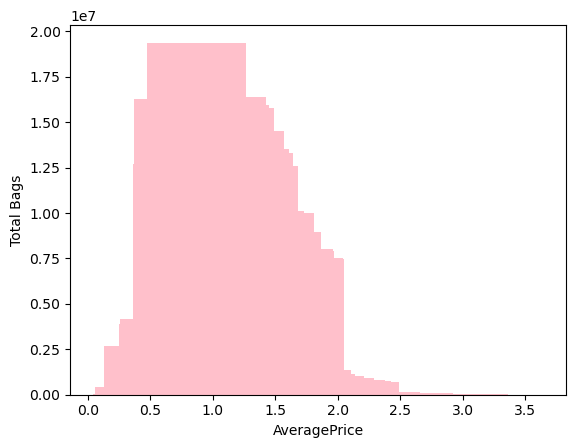

In [62]:
plt.bar(avo['AveragePrice'], avo['Total Bags'],color='pink')
plt.xlabel('AveragePrice')
plt.ylabel('Total Bags')
plt.show()

visualization of averageprice in comparison to total bags through bargraph.

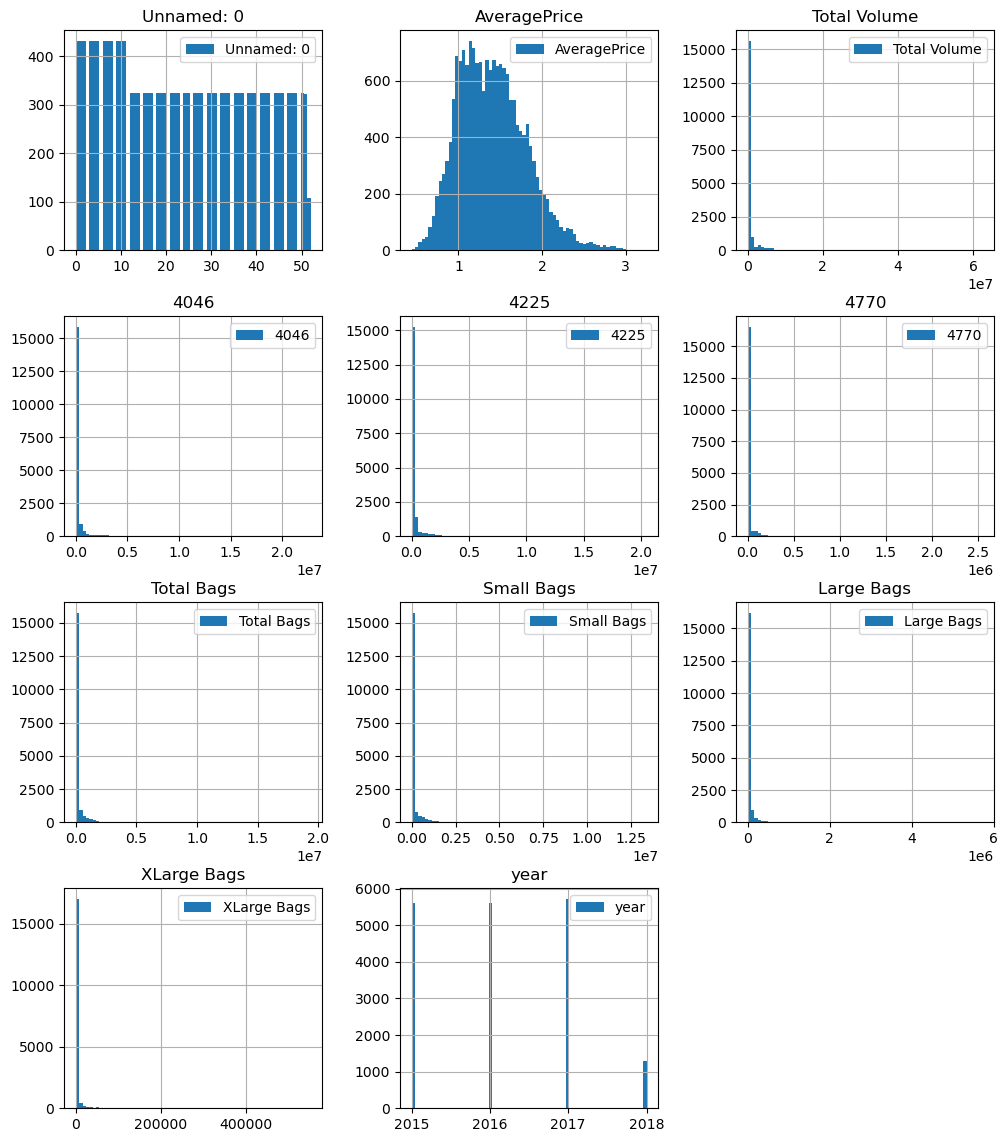

In [63]:
avo.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

visualization of all the columns.

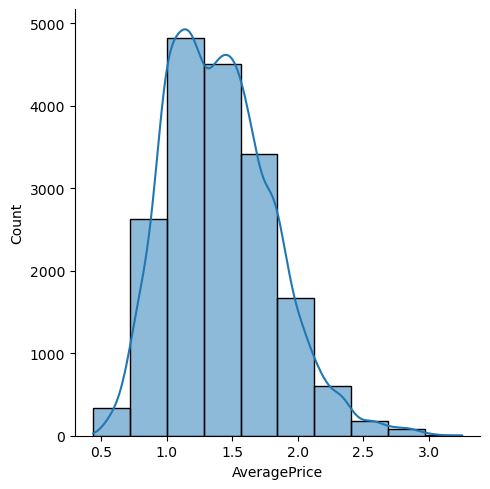

In [64]:
#type of avocado
sns.displot(avo['AveragePrice'],bins=10,kde=True)

We can see that as the count goes up the average price also rise.
It is skewed towards right.

In [66]:
#checking the correlation
avo.corr

<bound method DataFrame.corr of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

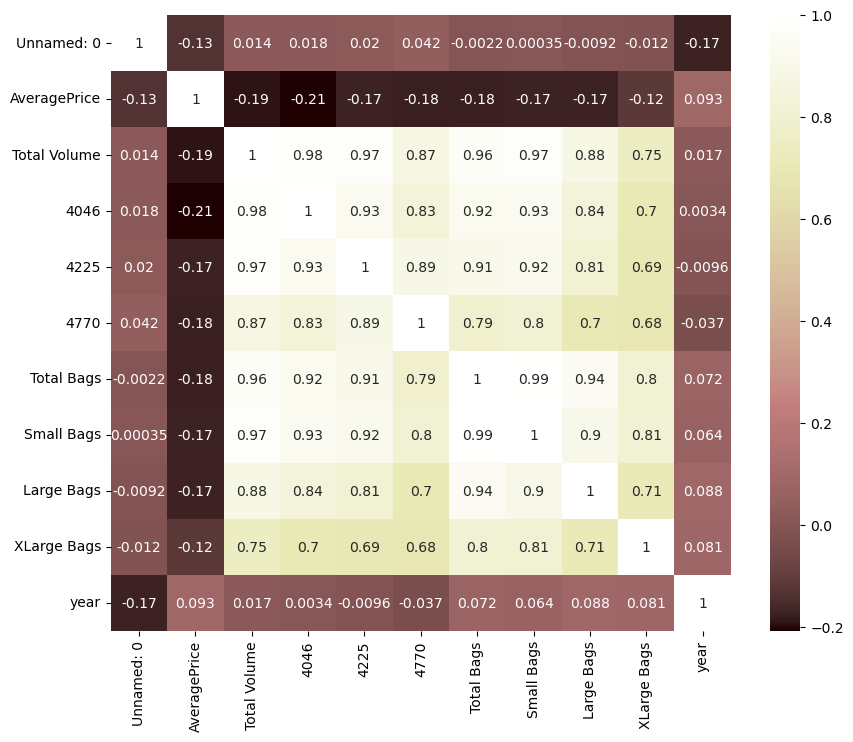

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(avo.corr(),cmap='pink',annot=True)
plt.show()

This heatmap contain both the positive and negative correlationship.
But there are no positive relationship between the target and feature.
4046,4770,total bag, small bag,large bag, xlargebags are negatively correlated with averageprice.
Rest are positively correlated with each other and negatively with averageprice.

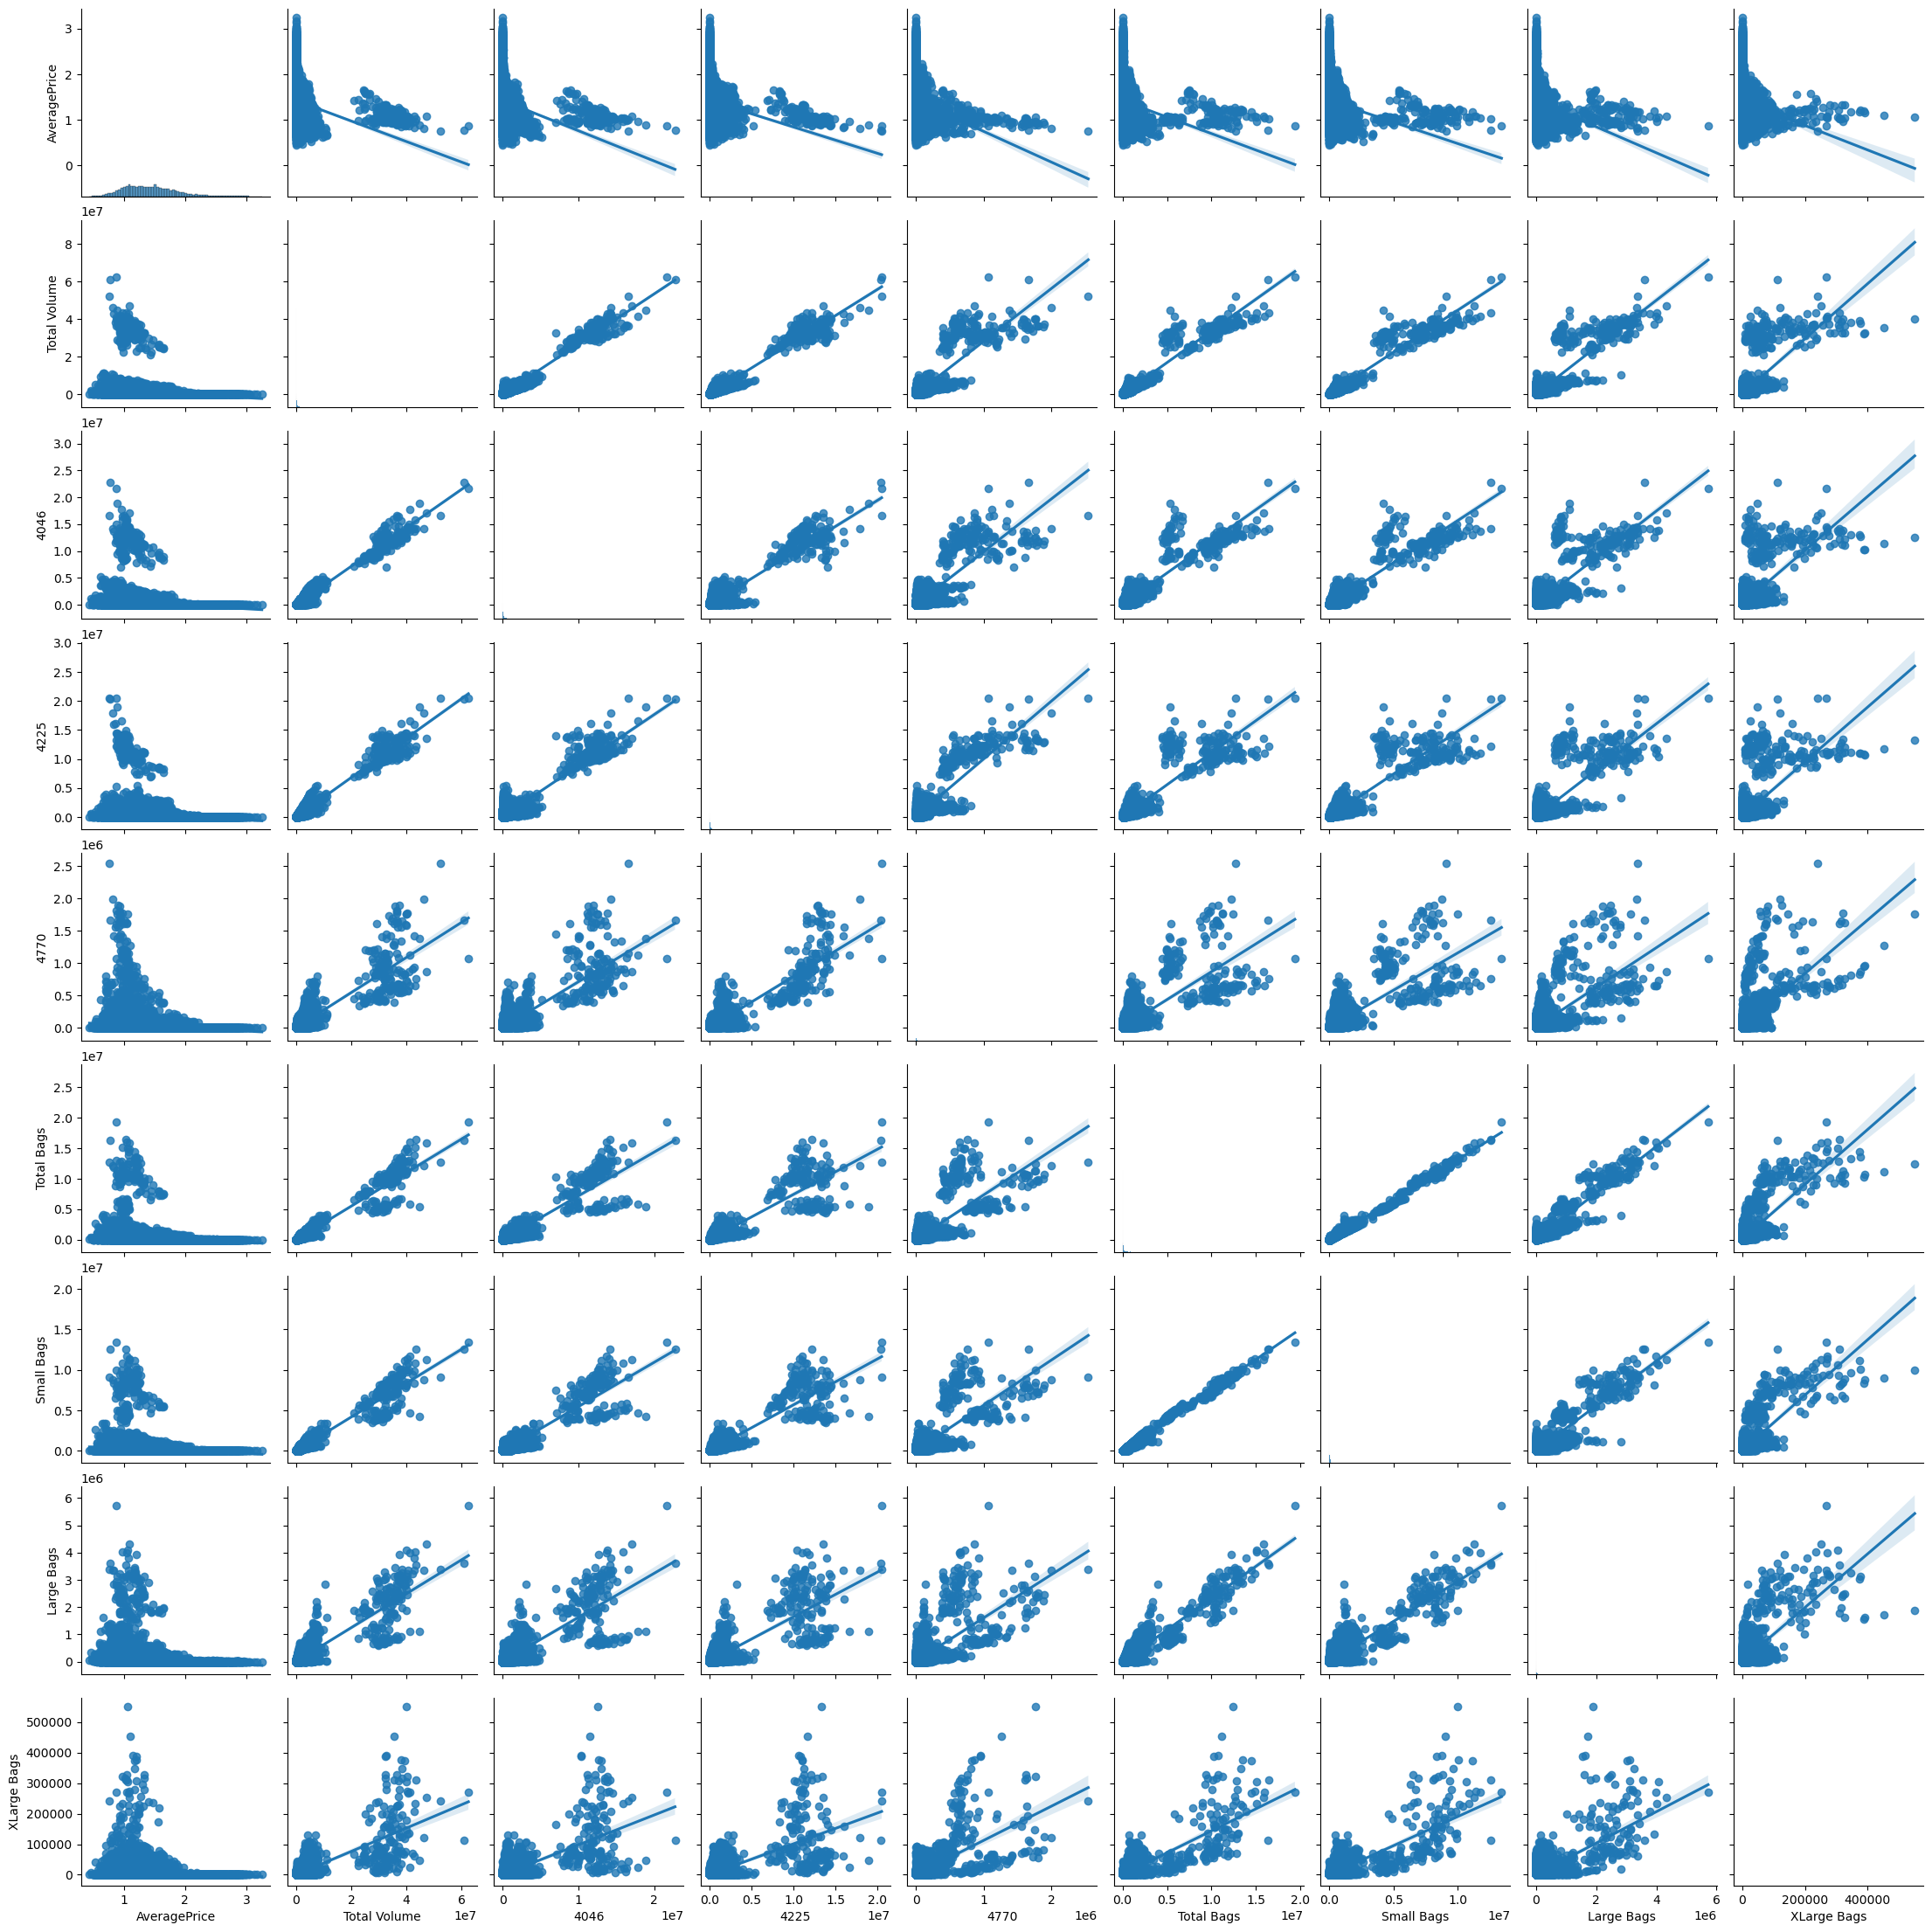

In [68]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(avo[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']], kind='reg')

On most dimensions, the points are scattered.
But we can clearly see some strong relationship between average price and other columns in the index. 

In [69]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
avo[['Date','year','type','region']]=enc.fit_transform(avo[['Date','year','type','region']])

In [70]:
avo['AveragePrice']=avo['AveragePrice'].astype(int)
avo['region']=avo['region'].astype(int)
avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  float64
 2   AveragePrice  18249 non-null  int32  
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  float64
 12  year          18249 non-null  float64
 13  region        18249 non-null  int32  
dtypes: float64(11), int32(2), int64(1)
memory usage: 1.9 MB


Unnamed: 0         Axes(0.125,0.786098;0.227941x0.0939024)
Date            Axes(0.398529,0.786098;0.227941x0.0939024)
AveragePrice    Axes(0.672059,0.786098;0.227941x0.0939024)
Total Volume       Axes(0.125,0.673415;0.227941x0.0939024)
4046            Axes(0.398529,0.673415;0.227941x0.0939024)
4225            Axes(0.672059,0.673415;0.227941x0.0939024)
4770               Axes(0.125,0.560732;0.227941x0.0939024)
Total Bags      Axes(0.398529,0.560732;0.227941x0.0939024)
Small Bags      Axes(0.672059,0.560732;0.227941x0.0939024)
Large Bags         Axes(0.125,0.448049;0.227941x0.0939024)
XLarge Bags     Axes(0.398529,0.448049;0.227941x0.0939024)
type            Axes(0.672059,0.448049;0.227941x0.0939024)
year               Axes(0.125,0.335366;0.227941x0.0939024)
region          Axes(0.398529,0.335366;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

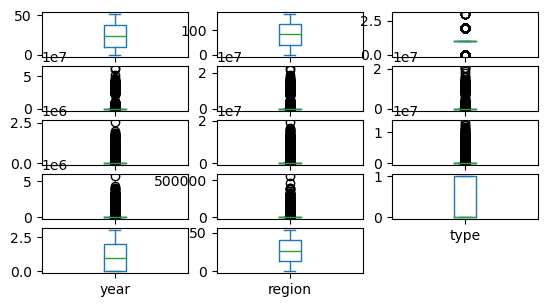

In [71]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
avo.plot(kind='box',subplots=True,layout=(7,3))  

Here we can see the presence of outliers in almost all the columns.

In [72]:
#removing outliers
out=avo[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [73]:
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [74]:
avo1=avo[(z<3).all(axis=1)]
avo1.shape

(17782, 14)

In [75]:
#checking skewness
avo1.skew()

Unnamed: 0      0.112971
Date            0.004284
AveragePrice   -0.170008
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [76]:
#distributing the data
x=avo.iloc[:,:-1]
y=avo.iloc[:,-1]

In [77]:
x=avo.drop('AveragePrice',axis=1)
y=avo['AveragePrice']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (18249, 13)
label dimension (18249,)


In [78]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.5653269 , -0.67635986, -0.22771641, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-1.50073001, -0.69685742, -0.23042664, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-1.43613312, -0.71735497, -0.21208462, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.98395486,  1.53737632, -0.24233073, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.91935797,  1.51687877, -0.24162464, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.85476108,  1.49638121, -0.24125273, ...,  1.00016441,
         1.97050371,  1.70081131]])

here we hace scaled the data using the standard scalarization method to overcome the issue of biasness.

# model buliding with regression

In [79]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [80]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    knn=KNN()
    knn.fit(x_train,y_train)
    pre=knn.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        

Best accuracy 0.530212000696035 at random state 116


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [82]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score:",r2_score(y_train,pred))
print("R2 score training data:",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.23114153090195866
R2 score training data: 26.143245221350607
Mean absolute error: 0.3203478307130805
Mean square error: 0.18011004103160894
Root mean square error: 0.42439373349710163


In [83]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.34975957843465355
36.2148680793533
Mean absolute error: 0.24672951549816788
Mean square error: 0.1555489780435808
Root mean square error: 0.3943969802668129


In [84]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9552606879140609
72.09571331013946
Mean absolute error: 0.1493406392694064
Mean square error: 0.06804851141552512
Root mean square error: 0.2608610960176414


In [85]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.6777888510208827
53.0212000696035
Mean absolute error: 0.19642009132420093
Mean square error: 0.11456438356164386
Root mean square error: 0.3384736083679847


In [86]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.0
-0.04417659045368172
Mean absolute error: 0.2965566758391225
Mean square error: 0.24397173697495153
Root mean square error: 0.4939349521697685


In [87]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
75.95244030212957
Mean absolute error: 0.13580091324200913
Mean square error: 0.05864334246575343
Root mean square error: 0.2421638752286423


In [88]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.23148036767714264
26.15705870926438
Mean absolute error: 0.32035980338425124
Mean square error: 0.1800763549065904
Root mean square error: 0.42435404429154483


# Cross Validation

In [89]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.01520709  0.10899672  0.01344372  0.01204702  0.02766392]
0.029388858121872308
difference between R2score and cross validation 2.321817289707715


cross validation score of ridge is 0.029388858121872308

In [90]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.15398977  0.12612968  0.21766231  0.04069279 -0.17002566]
0.012093870733807788
difference between R2score and cross validation 2.49476716358836


cross validation score of support vector is 0.012093870733807788

In [91]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[0.06722227 0.42252973 0.32658615 0.19700202 0.10905916]
0.22447986321177912
difference between R2score and cross validation 0.3709072388086468


cross validation score of randomforest is 0.22447986321177912

In [92]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.20772606  0.0415722   0.13452057 -0.0283779   0.00787594]
-0.010427051318104886
difference between R2score and cross validation 2.719976384107487


cross validation score of KNN is -0.010427051318104886

In [93]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.38213606 -0.32024237 -0.00470203 -0.26895808 -0.45959054]
-0.287125817623225
difference between R2score and cross validation 5.486964047158688


cross validation score of lasso is -0.287125817623225

In [94]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[0.17733829 0.40889948 0.35518812 0.19390353 0.10116403]
0.24729869079333783
difference between R2score and cross validation 0.14271896299305975


cross validation score of Extratrees is 0.24729869079333783

In [95]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.01669015  0.10856306  0.01385744  0.01142188 -0.40795073]
-0.058159699323598726
difference between R2score and cross validation 3.1973028641624253


cross validation score of Linearregression is -0.058159699323598726

ExtraTrees regressor is our best model as the difference between R2 score and cross validation score is least

# Setting Paramaters

In [96]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [97]:
para={'n_estimators':[80,100],
      'criterion':['squared_error','poisson'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'n_estimators': 100, 'n_jobs': None}


In [98]:
ex_new=ExtraTreesRegressor(criterion='squared_error',ccp_alpha=0.0,n_jobs=None,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.761031643263945


In [99]:
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.7605438348908395
mean absolute error: 0.13566027397260275
mean square error; 0.05839473972602739
root mean squre error: 0.24165003564251214


In [100]:
#importing pickle and saving file
import joblib
import pickle
filename="Avocado.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [101]:
#predicting the save model
load_m=pickle.load(open('Avocado.pkl','rb'))

In [102]:
result=load_m.score(x_test,y_test)
print(result*100)

76.05438348908396


In [103]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
predicted,0.06,0.3,1.08,1.05,0.01,0.99,0.08,0.97,1.07,0.99,...,0.3,0.92,0.92,1.57,0.73,1.0,0.52,0.9,1.95,1.99
orginal,0.00,0.0,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,...,1.0,1.00,1.00,1.00,1.00,1.0,0.00,1.0,2.00,2.00


# Building model using classification

In [104]:
x=avo.drop('region',axis=1)
y=avo['region']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (18249, 13)
label dimension (18249,)


In [105]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.5653269 , -0.67635986,  0.15415987, ..., -0.17557961,
        -0.99983562, -1.22128204],
       [-1.50073001, -0.69685742,  0.15415987, ..., -0.17557961,
        -0.99983562, -1.22128204],
       [-1.43613312, -0.71735497, -1.93904209, ..., -0.17557961,
        -0.99983562, -1.22128204],
       ...,
       [-0.98395486,  1.53737632,  0.15415987, ..., -0.17557961,
         1.00016441,  1.97050371],
       [-0.91935797,  1.51687877,  0.15415987, ..., -0.17557961,
         1.00016441,  1.97050371],
       [-0.85476108,  1.49638121,  0.15415987, ..., -0.17557961,
         1.00016441,  1.97050371]])

In [106]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pre=dtc.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8087671232876712 at random state 90


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [108]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8074885844748858
[[ 69   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   3]
 [  0   0 109 ...   0   0   2]
 ...
 [  0   0   0 ...  91   0   0]
 [  0   0   0 ...   1 103   0]
 [  0   3   1 ...   0   0  70]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        90
           1       0.72      0.78      0.75       101
           2       0.92      0.85      0.89       128
           3       0.81      0.80      0.81       115
           4       0.87      0.92      0.89        99
           5       0.71      0.81      0.76        79
           6       0.91      0.93      0.92        92
           7       0.85      0.85      0.85       110
           8       0.95      0.91      0.93        91
           9       0.85      0.78      0.81       105
          10       0.66      0.72      0.69       101
          11       0.87      0.88      0.87        90
          12       0.77      0.77      0.77        98
          13       0.81      0.7

The accuracy score of Decision tree is 80.74%

In [109]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.9099543378995434
[[ 86   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   1]
 [  0   0 124 ...   0   0   0]
 ...
 [  0   0   0 ...  91   0   0]
 [  0   0   0 ...   1 108   0]
 [  0   0   2 ...   0   0  90]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        90
           1       0.82      0.93      0.87       101
           2       0.98      0.97      0.97       128
           3       0.95      0.84      0.89       115
           4       0.94      0.97      0.96        99
           5       0.84      0.84      0.84        79
           6       0.96      0.98      0.97        92
           7       0.94      0.93      0.93       110
           8       0.98      0.93      0.96        91
           9       0.92      0.89      0.90       105
          10       0.91      0.91      0.91       101
          11       0.93      0.96      0.95        90
          12       0.96      0.87      0.91        98
          13       0.92      0.8

The accuracy score of Random forest is 90.99%

In [110]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.29771689497716897
[[37  0  0 ...  0  0  0]
 [ 5 16  0 ...  0  0  5]
 [ 1  0 48 ...  0  0  0]
 ...
 [ 0  0  0 ... 91  0  0]
 [ 0  0  0 ...  1 66  0]
 [ 3  0  0 ...  0  0 23]]
              precision    recall  f1-score   support

           0       0.11      0.41      0.18        90
           1       0.76      0.16      0.26       101
           2       0.87      0.38      0.52       128
           3       0.50      0.03      0.05       115
           4       0.44      0.32      0.37        99
           5       0.23      0.29      0.26        79
           6       0.64      0.51      0.57        92
           7       0.53      0.32      0.40       110
           8       0.88      0.51      0.64        91
           9       0.29      0.40      0.34       105
          10       0.07      0.09      0.08       101
          11       0.14      0.39      0.21        90
          12       0.37      0.36      0.36        98
          13       0.84      0.33      0.47       109
          14 

The accuracy score of Logistic regression is 29.77%

In [111]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.19579908675799088
[[14  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0 14]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 90  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  0  0 ...  0  0 12]]
              precision    recall  f1-score   support

           0       0.06      0.16      0.09        90
           1       0.00      0.00      0.00       101
           2       0.60      0.20      0.29       128
           3       0.00      0.00      0.00       115
           4       0.22      0.30      0.25        99
           5       0.02      0.44      0.05        79
           6       0.98      0.45      0.61        92
           7       0.33      0.01      0.02       110
           8       0.96      0.49      0.65        91
           9       0.52      0.14      0.22       105
          10       0.00      0.00      0.00       101
          11       0.15      0.37      0.22        90
          12       0.72      0.34      0.46        98
          13       0.93      0.25      0.39       109
          14 

The accuracy score of support vector is 19.57%

In [112]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.08383561643835616
[[ 0  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0 56]
 [ 0  0  0 ...  3  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ... 56  0  1]
 [ 0 21  0 ...  3  0 47]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.05      0.45      0.09       101
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00       115
           4       0.13      0.41      0.20        99
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        92
           7       0.00      0.00      0.00       110
           8       0.00      0.00      0.00        91
           9       0.00      0.00      0.00       105
          10       0.00      0.00      0.00       101
          11       0.09      0.41      0.15        90
          12       0.00      0.00      0.00        98
          13       0.00      0.00      0.00       109
          14 

The accuracy score of Adaboost is 08.38%

In [113]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.9000913242009132
[[ 89   0   0 ...   0   0   0]
 [  0  91   0 ...   0   0   1]
 [  0   0 126 ...   0   0   0]
 ...
 [  0   0   0 ...  91   0   0]
 [  0   0   0 ...   1 108   0]
 [  0   0   1 ...   0   0  93]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        90
           1       0.81      0.90      0.85       101
           2       0.95      0.98      0.97       128
           3       0.91      0.82      0.86       115
           4       0.95      0.98      0.97        99
           5       0.82      0.78      0.80        79
           6       0.95      0.99      0.97        92
           7       0.94      0.92      0.93       110
           8       0.97      0.98      0.97        91
           9       0.89      0.81      0.85       105
          10       0.89      0.83      0.86       101
          11       0.88      0.92      0.90        90
          12       0.94      0.85      0.89        98
          13       0.85      0.8

The accuracy score of Extratree is 90.00%

# checking the cross validation

In [114]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.47561644 0.67780822 0.64849315 0.56712329 0.43600987]
0.5610101923214093
0.09407400478769785
difference between accuracu score and cross validation 0.24647839215347656


cross validation score of decisiontree is 0.5610101923214093

In [115]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.63424658 0.80410959 0.76520548 0.7        0.49328583]
0.6793694951140676
0.10955978517452064
difference between accuracy score and corss validation 0.23058484278547575


cross validation score of randomforest is 0.6793694951140676

In [116]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.33643836 0.50575342 0.29452055 0.10493151 0.08002192]
0.2643331518862364
0.15733639166034072
difference between accuracy score and corss validation 0.03338374309093256


cross validation score of logistic regression is 0.2643331518862364

In [117]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.22054795 0.3260274  0.20547945 0.05342466 0.05234311]
0.1715645119511069
0.1054316378196996
difference between accuracy score and cross validation 0.024234574806883985


cross validation score of supportvector is 0.1715645119511069

In [118]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.0369863  0.04767123 0.07863014 0.03671233 0.03918882]
0.04783776377089614
0.01590302970636049
difference between accuracy score and cross validation 0.8522535604300171


cross validation score of adaboost is 0.04783776377089614

In [119]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.64219178 0.78575342 0.73972603 0.66356164 0.45601535]
0.6574496446765299
0.11320529887545278
difference between accuracy score and cross validation 0.2426416795243833


cross validation score of Extra trees classifier is 0.6574496446765299

ExtraTrees is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [120]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [125]:
para={'criterion':['gini','entropy'],
     'n_estimators':[10,50,100],
     'min_samples_leaf':[1,2]}
ex_cv=GridSearchCV(ExtraTreesClassifier(),para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100}


In [126]:
ex_new=ExtraTreesClassifier(criterion='gini',min_samples_leaf=1,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.9008219178082192
78.72146118721462


In [128]:
#Saving the model
import joblib
import pickle
filename="Avocado.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [129]:
#predicting the save model
model=pickle.load(open('Avocado.pkl','rb'))

In [130]:
result=model.score(x_test,y_test)
print(result*100)

90.08219178082192


In [132]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
predicted,41,35,21,0,40,31,40,14,50,49,...,40,49,46,31,32,19,8,34,7,27
orginal,41,35,21,0,40,48,40,14,50,49,...,40,49,46,31,32,19,8,34,7,27


this is the prediction of avocado in region